<h1>Berka bank</h1><hr>

In [29]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

<h3 style='color:orange'>Extract data</h3>

In [24]:
df_account = pd.read_csv('account.asc', sep=';')
df_card = pd.read_csv('card.asc', sep=';')
df_client = pd.read_csv('client.asc', sep=';')
df_disp = pd.read_csv('disp.asc', sep=';')
df_district = pd.read_csv('district.asc', sep=';')
df_loan= pd.read_csv('loan.asc', sep=';')
df_order= pd.read_csv('order.asc', sep=';')
df_trans = pd.read_csv('trans.asc', sep=';')

<h3 style='color:orange'>Exploratory data analysis</h3>

In [25]:
df_district

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Opava,north Moravia,182027,17,49,12,2,7,56.4,8746,3.33,3.74,90,4355,4433
73,74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782,18347
74,75,Prerov,north Moravia,138032,67,30,4,2,5,64.6,8819,5.38,5.66,99,4063,4505
75,76,Sumperk,north Moravia,127369,31,32,13,2,7,51.2,8369,4.73,5.88,107,3736,2807


In [26]:
df_account_district_merge = df_account.merge(df_district, left_on = 'district_id', right_on='A1', how = 'left')

In [27]:
df_account_district_merge = df_account_district_merge.groupby('frequency').agg({'account_id':'nunique'}).reset_index()
df_account_district_merge['relative_accounts'] = df_account_district_merge['account_id']/df_account_district_merge['account_id'].sum()
df_account_district_merge = df_account_district_merge.rename({'account_id':'unique_accounts'},axis= 1)

In [30]:
df_account_district_merge.round(2)

,frequency,unique_accounts,relative_accounts
0,POPLATEK MESICNE,4167,0.93
1,POPLATEK PO OBRATU,93,0.02
2,POPLATEK TYDNE,240,0.05


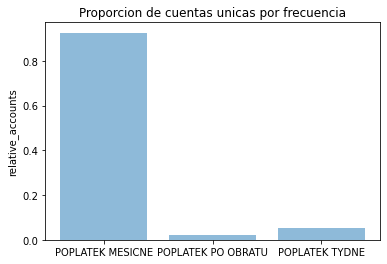

In [33]:
plt.bar(df_account_district_merge.frequency.tolist(), df_account_district_merge.relative_accounts.tolist(), align='center', alpha=0.5)
plt.ylabel('relative_accounts')
plt.title('Proporcion de cuentas unicas por frecuencia')
plt.show()

In [34]:
df_avg_accounts =  df_account.merge(df_district, left_on = 'district_id', right_on='A1', how = 'left').groupby('A3').agg({'account_id':'nunique','A11':'mean'}).reset_index().sort_values('account_id', ascending=False).rename({'account_id':'count_unique_accounts','A11':'avg_salary'},axis = 1)

In [35]:
df_avg_accounts

,A3,count_unique_accounts,avg_salary
4,north Moravia,793,9409.911728
6,south Moravia,778,8895.430591
1,central Bohemia,574,9408.621951
0,Prague,554,12541.000000
2,east Bohemia,544,8625.875000
3,north Bohemia,457,9310.026258
7,west Bohemia,430,9018.332558
5,south Bohemia,370,8817.321622


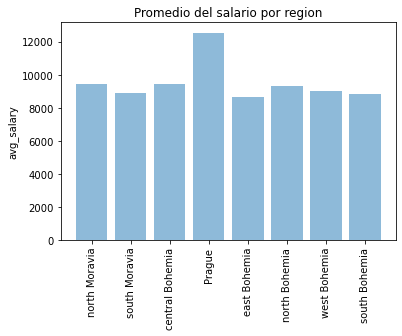

In [39]:
plt.bar(df_avg_accounts.A3.tolist(), df_avg_accounts.avg_salary.tolist(), align='center', alpha=0.5)
plt.ylabel('avg_salary')
plt.title('Promedio del salario por region')
plt.xticks(rotation=90)
plt.show()

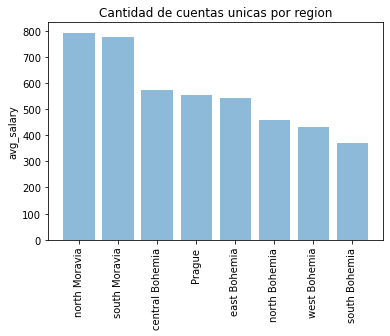

In [40]:
plt.bar(df_avg_accounts.A3.tolist(), df_avg_accounts.count_unique_accounts.tolist(), align='center', alpha=0.5)
plt.ylabel('avg_salary')
plt.title('Cantidad de cuentas unicas por region')
plt.xticks(rotation=90)
plt.show()

In [41]:
df_card_stats = df_card.groupby('type').agg({'card_id':'nunique'}).reset_index()

In [42]:
df_card_stats['relative_frequency'] = df_card_stats['card_id']/df_card_stats['card_id'].sum()

In [43]:
df_card_stats.round(2)

,type,card_id,relative_frequency
0,classic,659,0.74
1,gold,88,0.10
2,junior,145,0.16


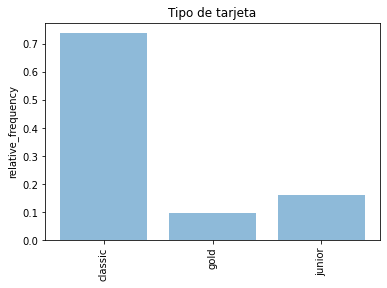

In [44]:
plt.bar(df_card_stats.type.tolist(), df_card_stats.relative_frequency.tolist(), align='center', alpha=0.5)
plt.ylabel('relative_frequency')
plt.title('Tipo de tarjeta')
plt.xticks(rotation=90)
plt.show()

In [22]:
df_client.merge(df_district, left_on = 'district_id', right_on='A1', how = 'left')

,client_id,birth_number,district_id,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,706213,18,18,Pisek,south Bohemia,70699,60,13,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
1,2,450204,1,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
2,3,406009,1,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
3,4,561201,5,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
4,5,605703,5,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13955,456030,1,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
5365,13956,430406,1,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
5366,13968,680413,61,61,Trebic,south Moravia,117897,139,28,5,1,6,53.8,8814,4.76,5.74,107,2112,2059
5367,13971,626019,67,67,Bruntal,north Moravia,106054,38,25,6,2,6,63.1,8110,5.77,6.55,109,3244,3079
